In [155]:
import joblib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import truvari.stats as ts
import truvari.utils as tu
import numpy as np
from pandas.api.types import CategoricalDtype
SZBINTYPE = CategoricalDtype(categories=ts.SZBINS, ordered=True)

In [ ]:
# Point to your Joblib here.
data = joblib.load("stats.jl")

In [201]:
def show_values_on_bars(axs, fmt='{:.2f}', buff=0, box=True, size=15):
    """ Given a barchart (seaborn or matplotlib), add values on top of bars
    c/o https://stackoverflow.com/a/51535326 """
    def _show_on_single_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + buff
            value = fmt.format(p.get_height())
            t = ax.text(_x, _y, value, ha="center", size=size)
            if box:
                t.set_bbox(dict(facecolor='white', alpha=0.5, edgecolor='white'))

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

/raid/home/english/pyve/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars


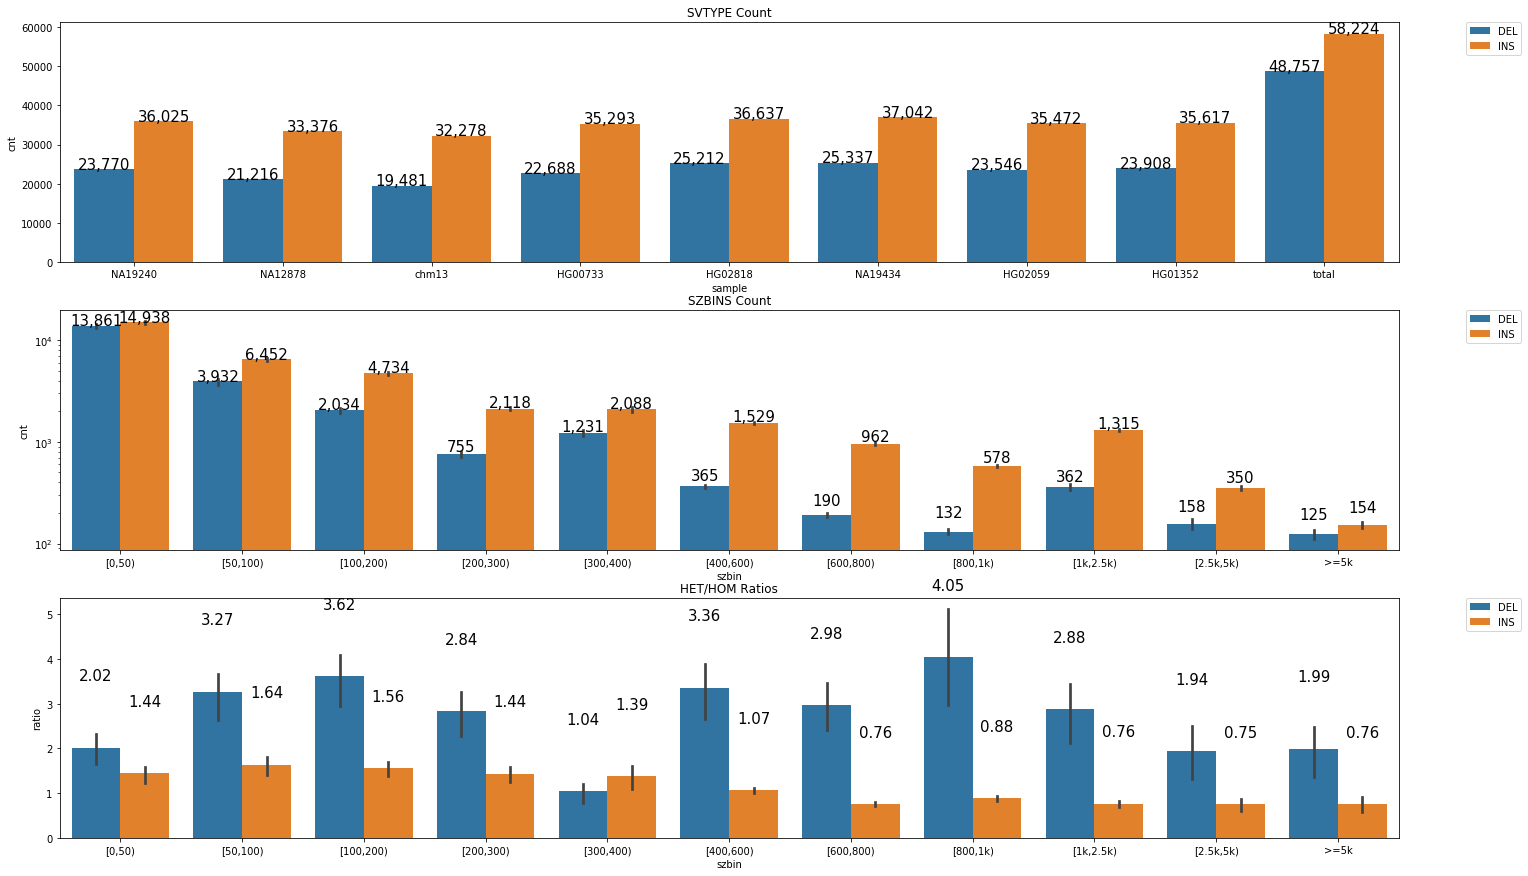

In [206]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,ncols=1, figsize=(24,15))

# Per Sample SV Counts
rows = []
plt.sca(ax1)
for i in data:
    for j in ts.SV:
        if i != "total":
            rows.append([i, j.name, data[i][j.value, :, :, ts.GT.HET.value:ts.GT.HOM.value + 1].sum()])
        else:
            rows.append([i, j.name, data[i][j.value, :, :].sum()])
d = pd.DataFrame(rows, columns=["sample", "svtype", "cnt"])
chart = sb.barplot(data=d[d["cnt"] != 0], y="cnt", x="sample", hue="svtype")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
chart.set(title="SVTYPE Count")
show_values_on_bars(chart, fmt="{:,.0f}", box=False, buff=50)

# Per SizeBin SV Counts
plt.sca(ax2)
rows = []
for i in data:
    for j in ts.SV:
        for k, k_lab in enumerate(ts.SZBINS):
            if i != "total":
                rows.append([i, j.name, k_lab, data[i][j.value, k, :, ts.GT.HET.value:ts.GT.HOM.value + 1].sum()])
                
d = pd.DataFrame(rows, columns=["sample", "svtype", "szbin", "cnt"])
d["szbin"] = d["szbin"].astype(SZBINTYPE)
chart = sb.barplot(data=d[d["cnt"] != 0], y="cnt", x="szbin", hue="svtype")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
chart.set(title="SZBINS Count", yscale="log")
show_values_on_bars(chart, fmt="{:,.0f}", box=False, buff=50)

# Per SizeBin Het/Hom Ratios
plt.sca(ax3)
rows = []
for i in data:
    for j in ts.SV:
        for k, k_lab in enumerate(ts.SZBINS):
            if i != "total":
                het = data[i][j.value, k, :, ts.GT.HET.value].sum()
                hom = data[i][j.value, k, :, ts.GT.HOM.value].sum()
                rows.append([i, j.name, k_lab, het/hom])
                
d = pd.DataFrame(rows, columns=["sample", "svtype", "szbin", "ratio"])
d["szbin"] = d["szbin"].astype(SZBINTYPE)
chart = sb.barplot(data=d[~d["ratio"].isna()], y="ratio", x="szbin", hue="svtype")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
chart.set(title="HET/HOM Ratios")
show_values_on_bars(chart, fmt="{:.2f}", buff=1.5, box=False)